In [318]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from pca import pca
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from sklearn.cluster import KMeans
import geopandas as gpd
# from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

set_link_color_palette(None)

In [319]:
arrest_df = pd.read_csv('UsArrests.csv')
arrest_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [320]:
# Check to see if there are any missing values
arrest_df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [321]:
arrest_df.info()  # Check that data types are appropriate which they seem to be

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [322]:
# Check to see if there are any 'suspicious' values like '?' or 0
for i in arrest_df.columns:
    print(arrest_df[i].unique())


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
[13.2 10.   8.1  8.8  9.   7.9  3.3  5.9 15.4 17.4  5.3  2.6 10.4  7.2
  2.2  6.   9.7  2.1 11.3  4.4 12.1  2.7 16.1  4.3 12.2  7.4 11.4 11.1
 13.   0.8  7.3  6.6  4.9  6.3  3.4 14.4  3.8 12.7  3.2  8.5  4.   5.7
  6.8]
[236 263 294 190 276 204 110 238 335 211  46 120 249 113  56 115 109  83
 300 149 255  72 259 178 102 252  57 159 285 254 337  45 151 106 174 279
  86 188 201  48 156 145  81  53 161]
[58 48 80 50 91

In [323]:
# Drop duplicates as a just in case measure
arrest_df.drop_duplicates(inplace=True)

## Exploratory Pairplot
As part of getting to know the data set a pair plot is producded below. We can see that a number of the features are positively corrwlated with each other and that within each feature the distribution tends to be gaussian.

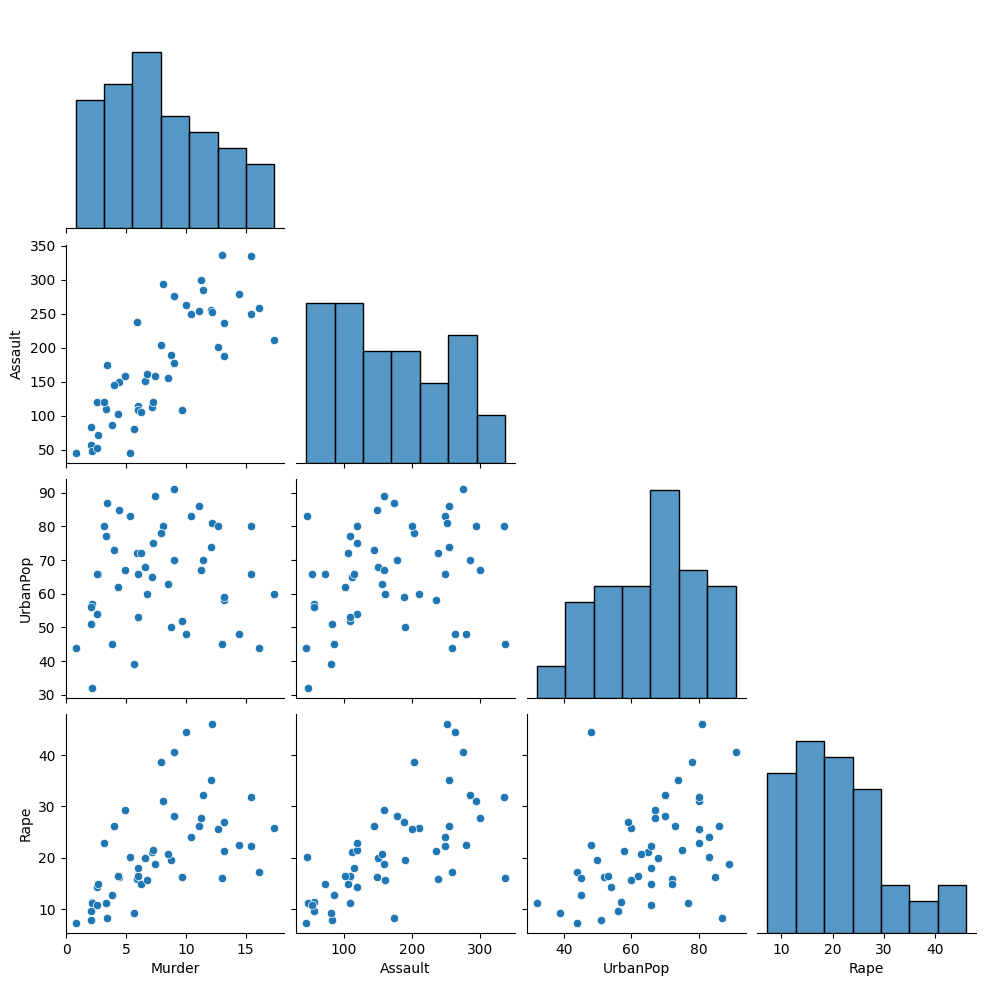

In [324]:
sns.pairplot(arrest_df, corner=True)

## Maximums:
Looking at the top 5 for a number of the features we can make very rough groups for high figures in a given feature. When sorting this produces the following:
- The highest murder rates belong to:
    - Georgia, Mississippi, Florida, Louisiana, South Carolina
- The highest assault rates belong to:
    - North Carolina, Florida, Maryland, Arizona, New Mexico
- The highest rape rates belong to:
    - Nevada, Alaska, California, Colorado, Michigan
- the highest urban population percentage belongs to:
    - California, New Jersey, Rhode Island, New york, Massachusetts

In [325]:
arrest_df.sort_values('Murder', ascending=False).head()

,City,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5


In [326]:
arrest_df.sort_values('Assault', ascending=False).head()

,City,Murder,Assault,UrbanPop,Rape
32,North Carolina,13.0,337,45,16.1
8,Florida,15.4,335,80,31.9
19,Maryland,11.3,300,67,27.8
2,Arizona,8.1,294,80,31.0
30,New Mexico,11.4,285,70,32.1


In [327]:
arrest_df.sort_values('Rape', ascending=False).head()

,City,Murder,Assault,UrbanPop,Rape
27,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
21,Michigan,12.1,255,74,35.1


In [328]:
arrest_df.sort_values('UrbanPop', ascending=False).head()

,City,Murder,Assault,UrbanPop,Rape
4,California,9.0,276,91,40.6
29,New Jersey,7.4,159,89,18.8
38,Rhode Island,3.4,174,87,8.3
31,New York,11.1,254,86,26.1
20,Massachusetts,4.4,149,85,16.3


## Minimums:
Looking at the bottom 5 for a number of the features we can make very rough groups for low figures in a given feature. When sorting this produces the following:
- The lowest murder rates belong to:
    - North Dakota, New Hampshire, Maine, Iowa, Vermont
- The lowest assault rates belong to:
    - North Dakota, Hawaii, Vermont, Wisconsin, Iowa
- The lowest rape rates belong to:
    - North Dakota, Maine, Rhode Island, West Virginia, New Hampshire
- the lowest urban population percentage belongs to:
    - Vermont, West Virginia, North Dakota, Mississippi, South Dakota

In [329]:
arrest_df.sort_values('Murder', ascending=True).head()

,City,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2


In [330]:
arrest_df.sort_values('Assault', ascending=True).head()

,City,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
10,Hawaii,5.3,46,83,20.2
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
14,Iowa,2.2,56,57,11.3


In [331]:
arrest_df.sort_values('Rape', ascending=True).head()

,City,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
18,Maine,2.1,83,51,7.8
38,Rhode Island,3.4,174,87,8.3
47,West Virginia,5.7,81,39,9.3
28,New Hampshire,2.1,57,56,9.5


In [332]:
arrest_df.sort_values('UrbanPop', ascending=True).head()

,City,Murder,Assault,UrbanPop,Rape
44,Vermont,2.2,48,32,11.2
47,West Virginia,5.7,81,39,9.3
33,North Dakota,0.8,45,44,7.3
23,Mississippi,16.1,259,44,17.1
40,South Dakota,3.8,86,45,12.8


## Initial correlations between features:
Plotting the correlations between features as a heat map we can acquire a quantified measure of the crrelations and identify their strength:
- There is a storng positive correlation between murder and assault
- There is a strong-ish correlation between assault and rape
- All correlations are (unfortunately) positive

C:\Users\vboxuser\AppData\Local\Temp\ipykernel_6668\470757924.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = arrest_df.corr()


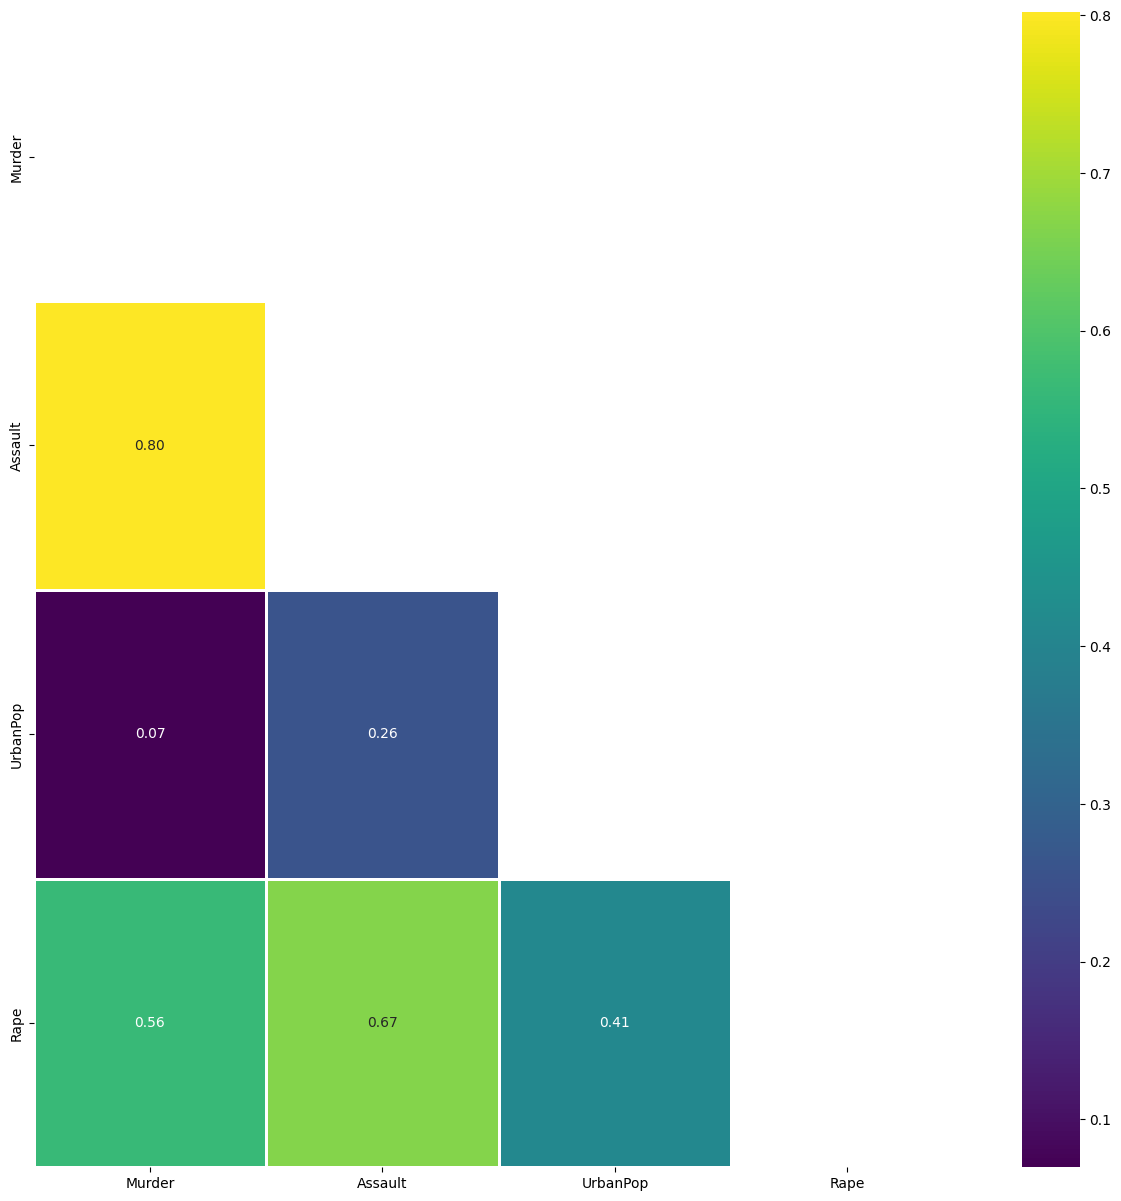

In [333]:
correlations = arrest_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
dropSelf = np.zeros_like(correlations)
dropSelf[np.triu_indices_from(dropSelf)] = True
ax = sns.heatmap(correlations, cmap='viridis', annot=True, fmt=".2f", mask=dropSelf, linewidth=2)
plt.show()

## Standardization:
to help both the machine learning algorithm to be applied as well as well as ensure principal component analysis isn't skewed by features with inherently large numbers the features are standardized via the the StandardScaler function within a seperate data frame.

In [334]:
features = arrest_df.iloc[:,1:5]
df_scaler = ColumnTransformer([('scaler', StandardScaler(), features.columns)], remainder='passthrough')
features.iloc[:,:] = df_scaler.fit_transform(features)
features.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


## Principal Component analysis:
Looking at the principal components within the data component 1 shows that any feature can be compared to show some correlation. Adding component 2 into the mix though murder and assault may be best placed for machine learning techniques.

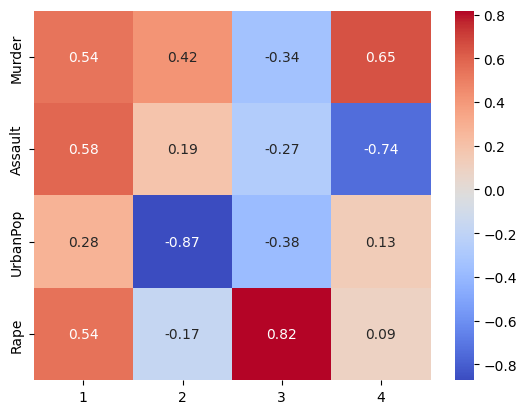

In [335]:
seed = 100
features['State'] = arrest_df['City'].values
features.set_index('State', inplace=True)
n = 4
# Two PCA algorithms will be used. The results generated are extremely similar
# on the order of x10-15 differences however have different useful functions
# and attributes.

model = pca(n_components=n, random_state=seed, detect_outliers=None, verbose=0)
PC = model.fit_transform(features)
# Dictionary keys for this output:
# 'loadings', 'PC', 'explained_var', 'variance_ratio', 'model', 'scaler', 
# 'pcp', 'topfeat', 'outliers', 'outliers_params'

model2 = PCA(n_components=n, random_state=seed)
pc = model2.fit_transform(features)

components = pd.DataFrame(model2.components_, columns=features.columns, index=range(1, n+1)).transpose()
ax = sns.heatmap(components,cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

### PCA biplot:
Visualising this as a biplot we can see that principal component 1 (PC1) is influenced positively by all features, most strongly by assault. PC2 however diverges and shows that a split is occuring between the upward facing features versus the downward facing features, the storngest of which is urban population. This is also shown quantitatively in the prinout below the graph.

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (62.0% expl.var)', ylabel='PC2 (24.7% expl.var)'>)

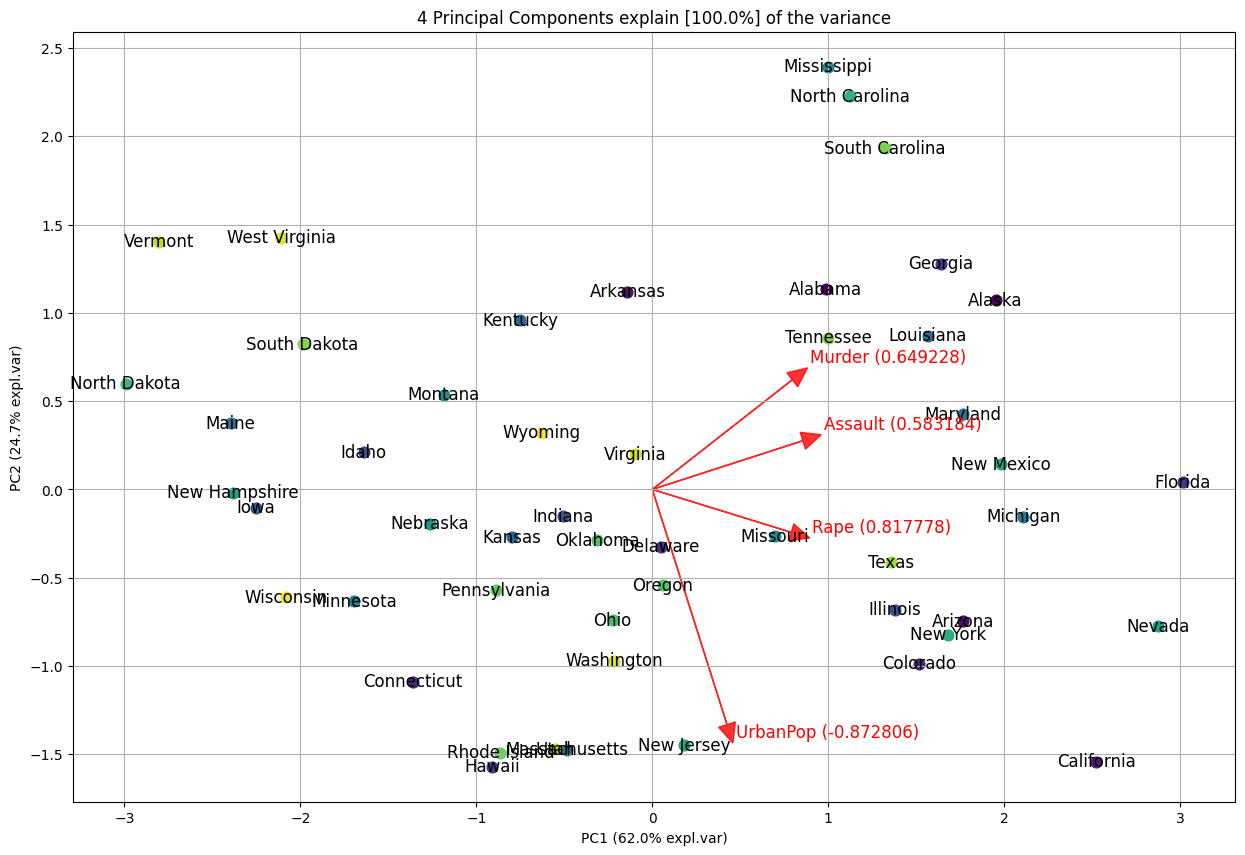

In [336]:
model.biplot(verbose=0, legend=False, c=[[0,0,255]], cmap='viridis')

In [337]:
print(PC['topfeat'])

    PC   feature   loading  type
0  PC1   Assault  0.583184  best
1  PC2  UrbanPop -0.872806  best
2  PC3      Rape  0.817778  best
3  PC4   Assault -0.743407  best
4  PC4    Murder  0.649228  weak


### Explained Variance:
To determine how many principal compponents are worth keeping to explore and cluster the data with we can look at the cummulative explained variance. This effectively tells us what percentage of the data is accounted for by each principal component. The plot below shows this with a horizontal green line marking the 85% boundary that we would consider as a minimum limit. As we an see only two components are required to account for this much. For further analsysi we will therefore use principal components 1 and 2.

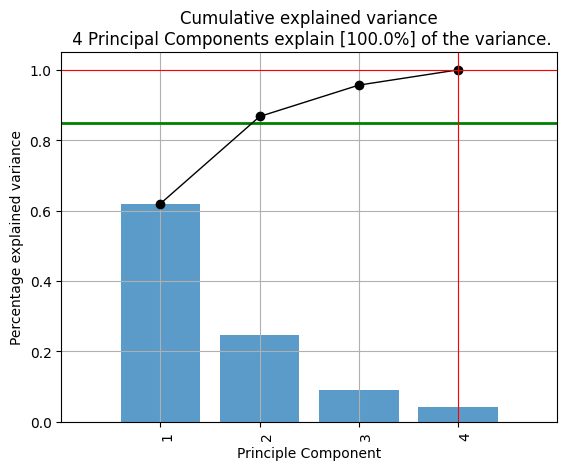

<Figure size 640x480 with 0 Axes>

In [338]:
fig, axes = plt.subplots()
axes.plot([0,5], [0.85,0.85], 'g-', linewidth=2)
model.plot(fig=fig)
plt.show()

In [339]:
n = 2
model = pca(n_components=n, random_state=seed, detect_outliers=None, verbose=0)
PC = model.fit_transform(features)

## Hierarchial Clustering:
To gain more information about how the data may be grouped a dendrogram is constructed with a variety of hyperparemeters. By eye it seems that a complete linkage and cityblock metric generate a balanced dendrogram with and the group size I would consider for further analysis is 2, 3 or possibly 4.

One suspicion I had is that there may be a geographic element. Using the geopandas module I was able to overlay the classification onto a map of the US where C1 is equivalent to the leftmost group of the dendrogram, C2 in the middle and C3 on the right. As a non-US citizen I'm not sure what I can read into this without significant research though. There may well be further information that's relevant and that connects these states like metrics for poverty or otherwise.

Looking at our orignal top 5s and bottom 5s though the clustering appears again with Vermont and North Dakota with very low rates of these crimes both appearing in the same group with others like them. It can perhaps be said that states clustered together in this group are safer than other states. Likewise a number of the high crime rate states appear in the left most orange group. This may therefore be represntative of the more 'dangerous' states while the red group (ironically) is somewhere in the middle.

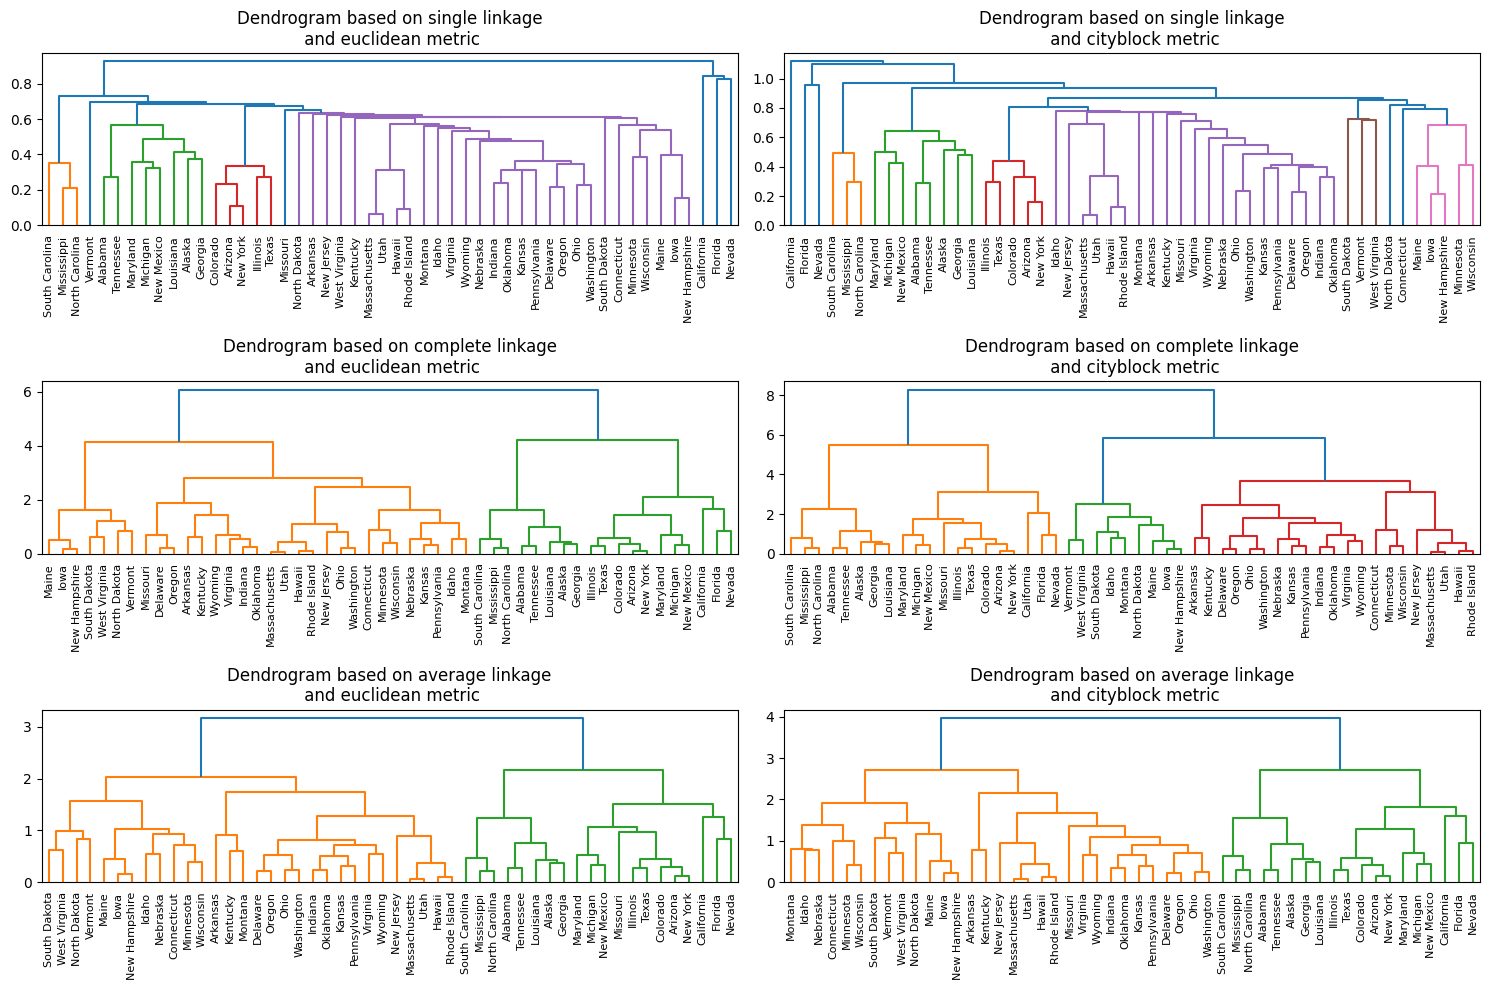

In [340]:
linkage_types = ['single', 'complete', 'average']
clus_dist = ['euclidean', 'cityblock']
index = 1
fig = plt.figure(figsize=(15,10))
for i, l in enumerate(linkage_types):
    for j, m in enumerate(clus_dist):
        plt.subplot(3, 2, index)
        index += 1
        dend = dendrogram(linkage(PC['PC'].values, method=l, metric=m),  labels=arrest_df['City'].values)  
        plt.title('Dendrogram based on {} linkage\n and {} metric'.format(l, m))
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Dendrogram based on average linkage\n and cityblock metric')

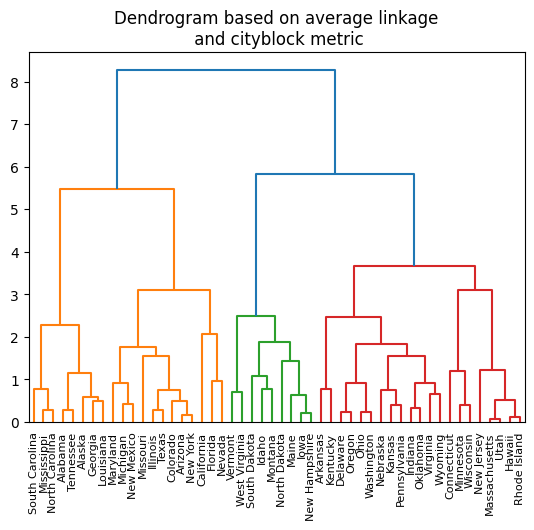

In [341]:
dend = dendrogram(linkage(PC['PC'].values, method='complete', metric='cityblock'),  labels=arrest_df['City'].values)  
plt.title('Dendrogram based on {} linkage\n and {} metric'.format(l, m))

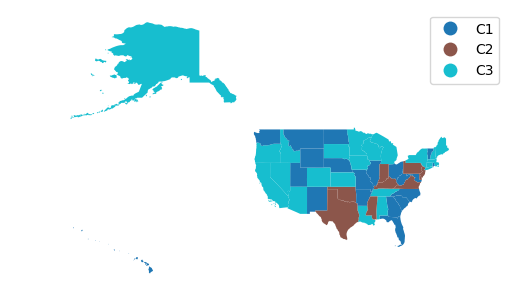

In [343]:
state_map = gpd.read_file('tl_2017_us_state/tl_2017_us_state.shp')

# 'United States Virgin Islands', 'Commonwealth of the Northern Mariana Islands'
# 'Guam, 'American Samoa', 'Puerto Rico', 'District of Columbia'
state_map.set_index('NAME', inplace=True)
state_map.drop(index=['United States Virgin Islands', 'District of Columbia','Commonwealth of the Northern Mariana Islands','Guam', 'American Samoa', 'Puerto Rico'], inplace=True)

state_group = np.column_stack([dend['ivl'], dend['leaves_color_list']])
state_group_df = pd.DataFrame(state_group, columns=['State', 'color'])
state_group_df.sort_values('State', inplace=True)
state_map['grouping'] = state_group_df['color'].values

ax = state_map.plot('grouping', legend=True, categorical=True, aspect='auto')
plt.xlim(right=-50)
ax.set_axis_off()

### Kmeans:
Using K means clustering we can identify basic clusters where the average distnace between centroids for a specified number of clusters is minimised. This is plotted below. Our dataset is fairly sparse so it's difficult to read too much into what the groups might signify or mean. One suspicion I had is that there may be a geographic element. Using the geopandas module I was able to overlay the classification onto a map of the US however as a non-US citizen I'm not sure what I can read into this without significant research.

From our knowledge of how the the principal copoennts influence the plot one possible interpretation is that group 2 corresponds to states where one is more likely to be assualted or murder while group 0 reflects an increased risk of rape.

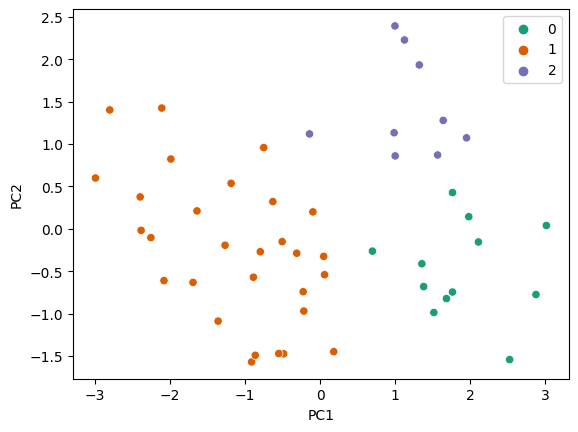

In [344]:
group_n = 3
model = KMeans(group_n, random_state=seed, n_init='auto')
group_labels = model.fit_predict(PC['PC'].values)
fig, axes = plt.subplots()
# DecisionBoundaryDisplay.from_estimator(model, X_test, response_method='predict', xlabel='Petal Length', ylabel='Petal Width', alpha = 0.7, ax=axes)
sns.scatterplot(x=PC['PC'].iloc[:,0], y=PC['PC'].iloc[:,1], palette='Dark2', hue=group_labels, ax=axes)
# plt.title(f'Model accuracy calculated to be {feature1_score}')
plt.show()

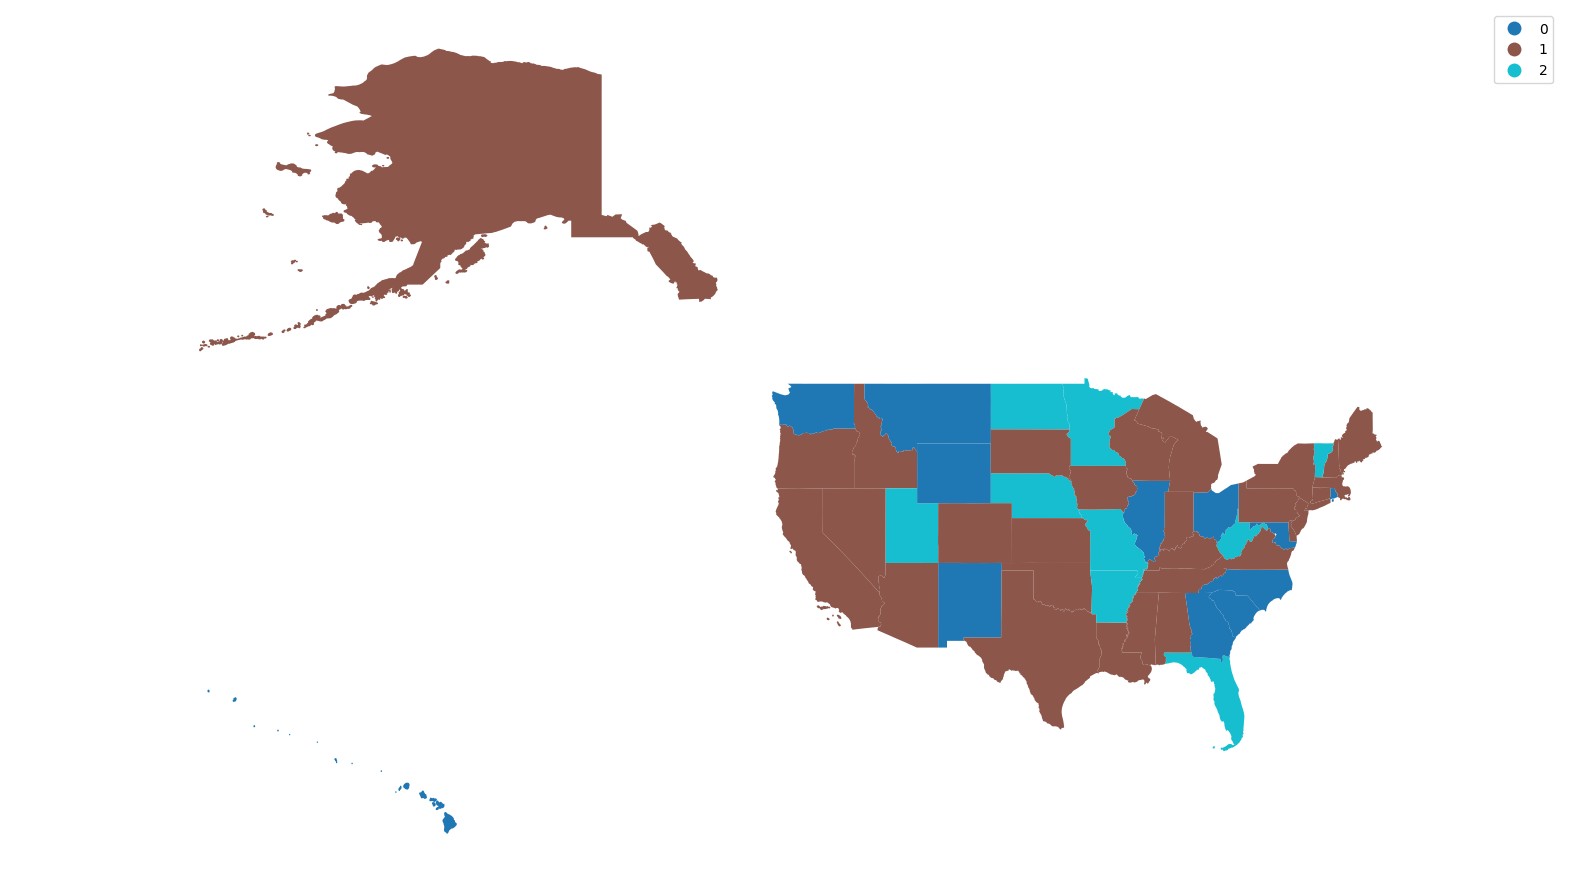

In [345]:
state_map['grouping'] = group_labels
ax = state_map.plot('grouping', legend=True, categorical=True, aspect='auto', figsize=(20,20))
plt.xlim(right=-50)
ax.set_axis_off()